# Out of the three main methods of Feature Selection :
- **Filter Method** : Correlation,Constant,Quasi-Constant
- **Embedded Method** : Coefficient, Lasso(L1 Regularization)
- **Wrapper Method** : OLS(Ordinary Least Square)

#### In this program we will be using the OLS Function under "Wrapper Method" for Backward Elimination 
- OLS function of Wrapper Method is specially designed for helping us in optimizing our Model for better performance, by recognising the unnecessary feature/variables and clarifying about them through the P.Value which is denoted by "P>|t|" in the ols_model.summary() results, i.e if the P.Value of any variable/feature is greater than the 'Significance Value' which is "0.05"(according to the Standard of Statistics) than it means,it will have negligible impact on the model prediction accuracy, and it should be removed to increase the model performance.


- This process of detecting the feature P.Values and accordingly removing the feature must be done one by one, because each time we remove a feature this makes an impact on the Coefficients and P.Values of other Variable/Features also therefore it is necessary each time after removal of feature or variable we must review the ols_model.summary() results again. 


- Note : One more important part of this process is to review the 'Adjusted R-Square' value also which is denoted by "Adj. R-squared:" in the same ols_model.summary() results, because if the value of 'Adj. R-squared:' increases each time after removing a feature than it is a good sign of increase in model Performance but if the value of 'Adj. R-squared:' decrease after the removal of any feature than it means this feature should not be removed. 

### Now, let's know about how to use the OLS model(Backward Elimination) :
- The OLS is the model which is available inside the 'stats_model.api' module, hence it must be imported using ** import  statsmodel.formula.api as sm **
- Then after importing, we use the module through 'sm' abbreviation for selecting the OLS model from it and at the same time we pass the X variable which contains the prepared features on which we want to do feature selection and y variable which holds the Output Values using the command **ols_model = sm.OLS(endog=X,exog=y,).fit()**


** Note : Again  there are few points to be remembered here : **
- i.e it seems OLS Model is also similar to other Models like Linear Regression, because in this also we have to fit the data into the OLS_Model, but only for doing the Feature Selection by getting the summary() and this is the difference here.


- The OLS model does not find the Bias(Intercept)Value on its own because it needs Constant feature to find the Intercept, for it we have to add one more feature/column in the X variable , and this column will be a constant Feature which contains only the value '1' in all its rows. Also this constant feature must be added at the first column position because OLS model looks for the Constant feature only at the location of First Column. And now we are ready to make the OLS Model work.


There are three ways of Feature Selection Filter Method,Wrapper Method and Embedded Method.
- Correlation,constant,quasi-constant functions comes under Filter Method. Filter methods can be used before training the model
- Coefficient function comes under Embedded method. Coefficient function model comes under Embedded method because we get the coefficient values only after creating the model and these coefficient values are stored inside the trained model or we can say they are embedded inside the model.
- Note: We cannot get the Coefficient Values before training the model

But there is another function which comes under Embedded method that can Tell us which features to use and which features to not use even before training the model and also tells the coefficient and intercept values. That feature selection model or function is Lasso() function also known as L1 Regularization

In [1]:
import pandas as pd 

In [2]:
dt=pd.read_csv("50_Startups.csv")

In [3]:
dt.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [4]:
dt.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
X=dt[['R&D Spend', 'Administration', 'Marketing Spend', 'State']]

** In the last session we used the 'get_dummies' function to do the one-hot-encoding of the variable 'State' in the dataset of '50_Startups' than removed variable 'State' from the data 'X' and added the dummy variables to it. This all we did step by step but we can also use the 'get_dummies' function to directly do all the above steps in a single command**
- For eg: pd.get_dummies(X, drop_first=True), here the "drop_first" attribute gives one more advantage of randomly removing any one of the duplicate variable from the dummy variables to avoid the 'Dummy Variable Trap' Situation

- Creating the Dummy Variables and dropping first Dummy Variable

In [6]:
X=pd.get_dummies(X,drop_first=True)

In [7]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.2,136897.80,471784.10,0,1
1,162597.7,151377.59,443898.53,0,0


In [8]:
import numpy as np

- Creating a np.ones array variable of shape (R,1), here R is the number of rows in the X variable dataset, which we will add into the X variable as a Constant Feature

In [9]:
X.shape

(50, 5)

In [10]:
ones=np.ones((50,1))

In [11]:
ones.shape

(50, 1)

- Inserting the above created ones array into the X variable as a column at '0' location, or we can say First column location, here 'False' is used for not overwriting any existing value inside the X variable , instead just add ones array as a new column in the X variable 

In [12]:
X.insert(0,"x0",ones,False)

In [13]:
X.head(2)

,x0,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,1.0,165349.2,136897.80,471784.10,0,1
1,1.0,162597.7,151377.59,443898.53,0,0


In [14]:
y=dt['Profit']

- Import the module which contains OLS model, and creating the OLS model instant as 'ols_model' abbreviation for fitting the new X and y variable in it.

In [15]:
import statsmodels.formula.api as sm

In [16]:
ols_model=sm.OLS(endog=y,exog=X).fit()

In [17]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.34e-27
Time:                        18:55:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               5.013e+04   6884.820      7.281      0.000    3.62e+04     6.4e+04
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
State_Florida     198.7888   3371.007      0.059      0.953   -6595.030    6992.607
State_New York    -41.8870   3256.039     -0.013      0.990   -6604.003    6520.229
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     1.45e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Above are the Summary results we get from OLS model**
- Here we can see the P.Values 'P>|t|' and 'Adj. R-squared:' value, hence we will remove the unncessary features from the X variable and again look at the summary results until we have all the features with P.values nearby 0.05 and maximum Adj. R-squared , let's begin with Feature Selection.

In [18]:
X.head(2)

,x0,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,1.0,165349.2,136897.80,471784.10,0,1
1,1.0,162597.7,151377.59,443898.53,0,0


In [19]:
X=X.drop('State_New York',axis=1)

In [20]:
X.head(2)

,x0,R&D Spend,Administration,Marketing Spend,State_Florida
0,1.0,165349.2,136897.80,471784.10,0
1,1.0,162597.7,151377.59,443898.53,0


In [21]:
ols_model=sm.OLS(endog=y,exog=X).fit()

In [22]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           8.49e-29
Time:                        18:55:09   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               5.011e+04   6647.870      7.537      0.000    3.67e+04    6.35e+04
R&D Spend           0.8060      0.046     17.606      0.000       0.714       0.898
Administration     -0.0270      0.052     -0.523      0.604      -0.131       0.077
Marketing Spend     0.0270      0.017      1.592      0.118      -0.007       0.061
State_Florida     220.1585   2900.536      0.076      0.940   -5621.821    6062.138
==============================================================================
Omnibus:                       14.758   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.172
Skew:                          -0.948   Prob(JB):                     2.53e-05
Kurtosis:                       5.563   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X=X.drop('State_Florida',axis=1)

In [24]:
X.head(2)

,x0,R&D Spend,Administration,Marketing Spend
0,1.0,165349.2,136897.80,471784.10
1,1.0,162597.7,151377.59,443898.53


In [25]:
ols_model=sm.OLS(endog=y,exog=X).fit()

In [26]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           4.53e-30
Time:                        18:55:10   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R&D Spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
X=X.drop('Administration',axis=1)

In [28]:
X.head(2)

,x0,R&D Spend,Marketing Spend
0,1.0,165349.2,471784.10
1,1.0,162597.7,443898.53


In [29]:
ols_model=sm.OLS(endog=y,exog=X).fit()

In [30]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.16e-31
Time:                        18:55:10   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
X=X.drop('Marketing Spend',axis=1)

In [32]:
ols_model=sm.OLS(endog=y,exog=X).fit()

In [33]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           3.50e-32
Time:                        18:55:10   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x0          4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
R&D Spend      0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- This time we observed that after removing the last feature 'Marketing Spend', the value of "Adj. R-squared:" decreased from 0.948 to 0.945, hence we must add that feature again to the X-Variable because it is important for model accuracy and performance

** Adding the Feature 'Marketing Spend' again to X

In [34]:
X.insert(2,'Marketing Spend',dt['Marketing Spend'],False)

In [35]:
X.head()

,x0,R&D Spend,Marketing Spend
0,1.0,165349.20,471784.10
1,1.0,162597.70,443898.53
2,1.0,153441.51,407934.54
3,1.0,144372.41,383199.62
4,1.0,142107.34,366168.42


In [36]:
ols_model=sm.OLS(endog=y,exog=X).fit()

In [37]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.16e-31
Time:                        18:55:17   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
x0               4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
R&D Spend           0.7966      0.041     19.266      0.000       0.713       0.880
Marketing Spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
import matplotlib.pyplot as plt  
plt.style.use('dark_background')

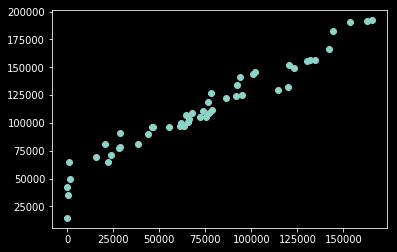

In [42]:

plt.scatter(dt['R&D Spend'],dt['Profit'])